Pour faire tourner ce notebook, vous devez avoir les fichiers frozen_lake_deterministic_transition.npy et frozen_lake_stochastic_transition.npy au même emplacement que votre notebook. Ces deux fichiers vous permetterons de générer les environnements. 

# Reinforcement Learning - Practical Session 1


## Présentation

Un processus de décision de Markov (PDM) est défini comme un tuple $(S, A, P, r, \gamma)$ où :
* $S$ est l'espace d'état
* $A$ est l'espace des actions 
* $P$ représente les probabilités de transition, $P(s,a,s')$ est la probabilité d'arriver à l'état $s'$ en faisant l'action $a$ dans l'état $s$.
* $r$ est la fonction de récompense telle que $r(s,a,s')$ est la récompense obtenue en prenant l'action $a$ dans l'état $s$ et en arrivant à $s'$.
* $\gamma$ est le facteur d'actualisationor

Une politique déterministe $\pi$ est une correspondance de $S$ à $A$ : $\pi(s)$ est l'action à prendre à l'état $s$.

L'objectif de l'agent est de trouver la politique $\pi$ qui maximise la somme attendue des récompenses actualisées en suivant $\pi$. La valeur de $\pi$ est définie comme suit

$$
V_\pi(s) = E\left[ \sum_{t=0}^\infty \gamma^t r(S_t, A_t, S_{t+1}) | S_0 = s \right]
$$

On peut montrer que la fonction de valeur optimale, définie comme étant $V^*(s) = \max_\pi V_\pi(s)$, satisfait l'équation de Bellman :

$$
V_\pi(s) = \sum_{s' \in S}  P(s,\pi(s),s')[r(s,\pi(s),s') + \gamma V_\pi(s')]
$$


$$
V^*(s) = \max_{a\in A} \sum_{s' \in S}  P(s,a,s')[r(s,a,s') + \gamma V^*(s')]
$$

Il est parfois préférable de travailler avec les Q fonctions :

$$
Q_\pi(s, a) = \sum_{s' \in S}  P(s,a,s')[r(s,a,s') + \gamma  Q^\pi(s', \pi(s')]
$$


$$
Q^*(s, a) = \sum_{s' \in S}  P(s,a,s')[r(s,a,s') + \gamma \max_{a'} Q^*(s', a')]
$$

tel que $V_\pi(s) = Q_\pi(s, \pi(s))$ et $V^*(s) = \max_a Q^*(s, a)$.


### Utilisation de l'itération des valeurs pour calculer une politique optimale
Si la fonction de récompense et les probabilités de transition sont connues (et que les espaces d'état et d'action ne sont pas très grands), nous pouvons utiliser des méthodes de programmation dynamique pour calculer $V^*(s)$. L'itération de valeurs est une façon de le faire.


#####  Itération de valeurs pour calculer $V^*(s)$:
$$
T^* Q(s,a) = \sum_{s'}P(s'|s,a)[ r(s, a, s') + \gamma \max_{a'} Q(s', a')]   \\
$$


* Pour tout $Q_0$, soit $Q_n = T^* Q_{n-1}$. 
* On a $\lim_{n\to\infty}Q_n = Q^*$ et $Q^* = T^* Q^*$.


#### Trouver la politique optimale à partir de  $V^\pi(s)$:

La politique optimale $\pi^*$ peut être calculée de la façon suivante

$$
\pi^*(s) \in \arg\max_{a\in A} Q^*(s, a) =  \arg\max_{a\in A} \sum_{s' \in S}  P(s,a,s')[r(s,a,s') + \gamma V^*(s')]
$$

###  Q-Learning et SARSA 

Lorsque la fonction de récompense et les probabilités de transition sont *inconnues*, nous ne pouvons pas utiliser la programmation dynamique pour trouver la fonction de valeur optimale. Q-Learning et SARSA sont des algorithmes d'approximation stochastique qui nous permettent d'estimer la fonction de valeur en utilisant uniquement des échantillons de l'environnement.

#####  Q-learning

L'algorithme Q-Learning nous permet d'estimer la Q fonction optimale en utilisant uniquement les trajectoires du MDP obtenues en suivant une certaine politique d'exploration. 

Q-learning avec une exploration de type $\varepsilon$-greedy effectue la mise à jour suivante au temps $t$ :

1. Dans l'état $s_t$, on effectue une action $a_t$ telle que $a_t$ est aléatoire avec une probabilité $\varepsilon$ et $a_t \in \arg\max_a \hat{Q}_t(s_t,a) $ avec une probabilité $1-\varepsilon$ ;
2. Observer $s_{t+1}$ et la récompense $r_t$ ;
3. Calculer $\delta_t = r_t + \gamma   \max_a \hat{Q}_t(s_{t+1}, a) - \hat{Q}_t(s_t, a_t)$ ;
4. Mettre à jour $\hat{Q}_{t+1}(s, a) = \hat{Q}_t(s, a) + \alpha_t(s,a)\delta_t\mathbb{1}\{s=s_t, a=a_t\} $.


##### SARSA

SARSA est similaire à l'apprentissage Q, mais c'est un algorithme *sur-politique* : il suit une politique (stochastique) $\pi_Q$ et met à jour son estimation vers la valeur de cette politique. Un choix possible est le suivant :

$$
\pi_Q(a|s) = \frac{ \exp(\tau^{-1}Q(s,a))  }{\sum_{a'}\exp(\tau^{-1}Q(s,a')) }
$$
où $\tau$ est un paramètre de "contrôle" : lorsque $\tau$ s'approche de 0, $\pi_Q(a|s)$ se rapproche de la politique greedy (déterministe) $a \in \arg\max_{a'}Q(s,a')$.

À chaque instant $t$, SARSA conserve une estimation $\hat{Q}_t$ de la vraie  Q fonction et utilise $\pi_{\hat{Q}_t}(a|s)$ pour choisir l'action $a_t$. Si $\tau \to 0$ avec un taux approprié comme $t \to \infty$, $\hat{Q}_t$ converge vers $Q$ et $\pi_{\hat{Q}_t}(a|s)$ converge vers la politique optimale $\pi^*$.

La mise à jour SARSA au temps $t$ se fait comme suit :

1. Dans l'état $s_t$, on effectue l'action $a_t \sim \pi_{\hat{Q}_t}(a|s_t)$ ;
2. Observer $s_{t+1}$ et la récompense $r_t$ ;
3. Echantillonner l'action suivante $a_{t+1} \sim \pi_{\hat{Q}_t}(a|s_{t+1})$;
4. Calculer $\delta_t = r_t + \gamma \hat{Q}_t(s_{t+1}, a_{t+1}) - \hat{Q}_t(s_t, a_t)$.
5. Actualisez $ \hat{Q}_{t+1}(s, a) = \hat{Q}_t(s, a) + \alpha_t(s,a)\delta_t\mathbb{1}\{s=s_t, a=a_t\}$.

## Objectifs

Votre objectif est d'implémenter l'itération de valeurs, le Q-Learning et SARSA pour l'environnement [Frozen Lake](https://gym.openai.com/envs/FrozenLake-v0/).

* Dans l'exercice 1, vous implémenterez les opérateurs de Bellman $T^\pi$ et $T^*$ et vérifierez leurs propriétés.
* Dans l'exercice 2, vous implémenterez l'itération de valeurs.
* Dans les exercices 3 et 4, vous implémenterez Q-Learning et SARSA


Voici dans un premier temps quelques fonctions qui vous permetteront d'évoluer dans votre environnement

In [1]:
from abc import ABC, abstractmethod
import numpy as np


class FiniteEnv(ABC):
    """
    Base class for a finite MDP.

    Args:
        states      (list): List of legnth S containing the indexes of the states, e.g. [0,1,2]
        action_sets (list): List containing the actions available in each state, e.g. [[0,1], [2,3]],
                            action_sets[i][j] returns the index of the j-th available action in state i
        P       (np.array): Array of shape (Ns, Na, Ns) containing the transition probabilities,
                            P[s, a, s'] = Prob(S_{t+1}=s'| S_t = s, A_t = a). 
        gamma      (float): discount factor


    Attributes:
        Ns   (int): Number of states
        Na   (int): Number of actions
        actions (list): list containing all possible actions = [0, 1, ..., Na-1]

    """
    def __init__(self, states, action_sets, P, gamma):

        self.states = states
        self.action_sets = action_sets
        self.actions = list(set().union(*action_sets))
        self.Ns = len(states)
        self.Na = len(self.actions)
        self.P = P

        self.state = 0  # initial state
        self.gamma = gamma
        self.reset()
        super().__init__()

    def available_actions(self, state=None):
        """
        Return all actions available in a given state.
        """
        if state is not None:
            return self.action_sets[state]
        return self.action_sets[self.state]

    @abstractmethod
    def reset(self):
        """
        Reset the environment to a default state.

        Returns:
            state (object)
        """
        pass

    @abstractmethod
    def reward_func(self, state, action, next_state):
        """
        Args:
            state      (int): current state
            action     (int): current action
            next_state (int): next state

        Returns:
            reward (float)
        """
        pass

    @abstractmethod
    def step(self, action):
        """
        Execute a step. Similar to gym function [1].
        [1] https://gym.openai.com/docs/#environments

        Args:
            action (int): index of the action to take

        Returns:
            observation (object)
            reward      (float)
            done        (bool)
            info        (dict)
        """
        pass

    @abstractmethod
    def sample_transition(self, s, a):
        """
        Sample a transition s' from P(s'|s,a).

        Args:
            s (int): index of state
            a (int): index of action

        Returns:
            ss (int): index of next state
        """
        pass

In [2]:
import numpy as np
import os


class MDP(FiniteEnv):
    """
    Enviroment with 3 states and 2 actions per state that gives a reward of 1 when going to the
    last state and 0 otherwise.

    Args:
        gamma (float): discount factor
        seed    (int): Random number generator seed

    """

    def __init__(self, P, bad_states=[], gamma=0.99, seed=42):
        # Set seed
        self.RS = np.random.RandomState(seed)

        # Transition probabilities
        # shape (Ns, Na, Ns)
        # P[s, a, s'] = Prob(S_{t+1}=s'| S_t = s, A_t = a)
 
        P = P
        Ns, Na, _ = P.shape
        
        self.Ns = Ns
        self.Na = Na
        self.bad_states = set(bad_states)

        # Initialize base class
        states = np.arange(Ns).tolist()
        action_sets = [np.arange(Na).tolist()]*Ns
        super().__init__(states, action_sets, P, gamma)

    def reward_func(self, state, action, next_state):
        return 1.0 * (next_state == self.Ns - 1) 

    def reset(self, s=0):
        self.state = s
        return self.state

    def step(self, action):
        next_state = self.sample_transition(self.state, action)
        reward = self.reward_func(self.state, action, next_state)
        
        if self.state in self.bad_states or self.state == self.Ns-1:
            done = True
        else:
            done = False
            
        info = {}
        self.state = next_state

        observation = next_state
        return observation, reward, done, info

    def sample_transition(self, s, a):
        prob = self.P[s,a,:]
        s_ = self.RS.choice(self.states, p = prob)
        return s_
    
    def render(self):        
        
        env_to_print = "S"

        
        for state in range(1,self.Ns-1) :
            if state % 4 == 0:
                env_to_print += "\n"
            
            if state in self.bad_states:
                env_to_print += "H"
            else:
                env_to_print += "F"
                    
        env_to_print += "G"
        
        print("(S: starting point, safe) (F: frozen surface, safe) (H: hole, fall to your doom) (G: goal, where the frisbee is located)")
        print("=================")
        print(env_to_print)
        print("=================")
        print("Current state", self.state)
        
        
class FrozenLake(MDP):
    def __init__(self, gamma=0.99, deterministic=False, data_path="./data"):
        if deterministic:
            P = np.load( "frozen_lake_deterministic_transition.npy")
        else:
            P = np.load("frozen_lake_stochastic_transition.npy")
        bad_states = [5, 7, 11, 12]
        super().__init__(P=P, bad_states=bad_states, gamma=gamma)

In [3]:
import numpy as np
from abc import ABC, abstractmethod
import numpy as np


class ToyEnv1(FiniteEnv):
    """
    Enviroment with 3 states and 2 actions per state that gives a reward of 1 when going to the
    last state and 0 otherwise.

    Args:
        gamma (float): discount factor
        seed    (int): Random number generator seed

    """

    def __init__(self, gamma=0.99, seed=42):
        # Set seed
        self.RS = np.random.RandomState(seed)

        # Transition probabilities
        # shape (Ns, Na, Ns)
        # P[s, a, s'] = Prob(S_{t+1}=s'| S_t = s, A_t = a)

        Ns = 3
        Na = 2
        P = np.zeros((Ns, Na, Ns))

        P[:, 0, :] = np.array([[0.25, 0.5, 0.25], [0.1, 0.7, 0.2], [0.1, 0.8, 0.1]])
        P[:, 1, :] = np.array([[0.3, 0.3, 0.4], [0.7, 0.2, 0.1], [0.25, 0.25, 0.5]])

        # Initialize base class
        states = np.arange(Ns).tolist()
        action_sets = [np.arange(Na).tolist()]*Ns
        super().__init__(states, action_sets, P, gamma)

    def reward_func(self, state, action, next_state):
        return 1.0 * (next_state == self.Ns - 1)

    def reset(self, s=0):
        self.state = s
        return self.state

    def step(self, action):
        next_state = self.sample_transition(self.state, action)
        reward = self.reward_func(self.state, action, next_state)
        done = False
        info = {}
        self.state = next_state

        observation = next_state
        return observation, reward, done, info

    def sample_transition(self, s, a):
        prob = self.P[s,a,:]
        s_ = self.RS.choice(self.states, p = prob)
        return s_

In [4]:
import sys
import numpy as np
from scipy.special import softmax # for SARSA
import matplotlib.pyplot as plt



# FrozenLake environment

In [75]:
# Creating an instance of FrozenLake
# --- If deterministic=False, transitions are stochastic. Try both cases!
env = FrozenLake(gamma=0.95, deterministic=True)
# Small environment for debugging
#env = ToyEnv1(gamma=0.95)

# Useful attributes
print("Set of states:", env.states)
print("Set of actions:", env.actions)
print("Number of states: ", env.Ns)
print("Number of actions: ", env.Na)
print("P has shape: ", env.P.shape)  # P[s, a, s'] = env.P[s, a, s']
print("discount factor: ", env.gamma)
print("")

# Useful methods
state = env.reset() # get initial state
print("initial state: ", state)
print("reward at (s=1, a=3,s'=2): ", env.reward_func(1,3,2))
print("")

# A random policy
policy = [1,2,1,0,1,2,1,2,2,2,1,1,1,2,2,1]


# Interacting with the environment
print("(s, a, s', r):")
for time in range(len(policy)):
    action = policy[state]
    next_state, reward, done, info = env.step(action)
    print(state, action, next_state, reward)
    if done:
        break
    state = next_state
print("")

# Visualizing the environment
try:
    env.render()
except:
    pass # render not available

Set of states: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
Set of actions: [0, 1, 2, 3]
Number of states:  16
Number of actions:  4
P has shape:  (16, 4, 16)
discount factor:  0.95

initial state:  0
reward at (s=1, a=3,s'=2):  0.0

(s, a, s', r):
0 1 4 0.0
4 1 8 0.0
8 2 9 0.0
9 2 10 0.0
10 1 14 0.0
14 2 15 1.0
15 1 15 1.0

(S: starting point, safe) (F: frozen surface, safe) (H: hole, fall to your doom) (G: goal, where the frisbee is located)
SFFF
FHFH
FFFH
HFFG
Current state 15


# Exercise 1: Bellman operator

1. Écrire une fonction qui prend en entrée un environnement et une fonction de valeur état-action $Q$ et qui renvoie l'opérateur d'optimalité de Bellman appliqué à $Q$, $T^* Q$ et la politique greedy par rapport à $Q$.


La propriété de contraction de l'opérateur de Bellman est utilisée pour garantir la convergence d'algorithmes d'apprentissage par renforcement comme l'algorithme Q-learning et SARSA. Elle stipule que si une fonction d'utilité V est utilisée pour approximer la fonction de valeur optimale Q* pour un environnement donné, alors l'application de l'opérateur de Bellman sur V produira une fonction V' qui est plus proche de Q* que V lui-même. Cela signifie que lorsque l'algorithme itère en utilisant l'opérateur de Bellman pour mettre à jour sa fonction d'utilité, il converge vers la fonction de valeur optimale Q*. Cette propriété est importante pour garantir la convergence de l'algorithme et assurer qu'il trouve la politique optimale pour un environnement donné.

2. Soit $Q_1$ et $Q_2$ des fonctions de valeur état-action. Vérifier la propriété de contraction : $\Vert T^* Q_1 - T^* Q_2\Vert \leq \gamma ||Q_1 - Q_2||$, où $||V|| = \max_{s,a} |Q(s,a)|$.

Rappelons $
T^* Q(s,a) = \sum_{s'}P(s'|s,a)[ r(s, a, s') + \gamma \max_{a'} Q(s', a')] .
$

In [76]:
# --------------
# Your answer to 1.
# --------------
def bellman_operator(Q, env):
    TQ = np.zeros((env.Ns, env.Na))
    greedy_policy = np.zeros((env.Ns))
    for state in env.states:
        for action in env.actions:
            prob = env.P[state,action,:]
            rewards = np.array([env.reward_func(state,action,next_state) for next_state in env.states])
            TQ[state,action] = np.sum(prob*(rewards + env.gamma*Q.max(axis=1)))

    greedy_policy = np.argmax(TQ, axis=1)
    return TQ, greedy_policy

### Aide :
    # Initialiser TQ (np.zeros((Nombre d'état, nombre d'action))
    # Intialiser greedy_policy(nombre d'action)
    # Pour tous les état de l'environnement
    ## Pour toutes les actions
    ### prob récupérée dans l'environnement (pour un état, action)
    ### recupérer dans une liste les rewards possible depuis l'état post-action
    ### TQ[s,a] = np.sum( prob*(rewards + env.gamma*Q.max(axis=1)))

In [77]:
# --------------
# Your answer to 2.
# --------------
n_simulations = 200
echec = False
#lancer pour n_simulation
for n in range(n_simulations):
    Q1 = np.random.randn(env.Ns, env.Na)
    Q2 = np.random.randn(env.Ns, env.Na)

    Tq_1, e_g1 = bellman_operator(Q1,env)
    Tq_2, e_g2 = bellman_operator(Q2,env)

    if np.abs((Tq_1 - Tq_2).max()) / np.abs(Q1-Q2).max() > 1:
        echec = True
        break

print("Contraction of Bellman operator :" + str(not echec))

Contraction of Bellman operator :True


# Exercise 2: Value iteration

1. (Fonction de valeur optimale) Ecrivez une fonction qui prend en entrée une fonction de valeur état-action initiale `Q0` et un environnement `env` et qui retourne un vecteur `Q` tel que $||T^* Q - Q ||_\infty \leq \varepsilon $ et la politique greedy par rapport à $Q$.
2. Testez la convergence de la fonction que vous avez implémentée.
3. Affichez $Q$ et $V$

In [78]:
# --------------
# Your answer to 1.
# --------------
def value_iteration(Q0, env, epsilon=1e-5):
    """
    Finding the optimal value function. To be done!
    """
    Q = Q0
    TQ, greedy_policy = bellman_operator(Q,env)

    while np.max(np.abs(TQ-Q)) > epsilon:
        Q = TQ
        TQ, greedy_policy = bellman_operator(Q,env)

    return TQ, greedy_policy
# Initialiser Q à l'aide de Q0
    # Tant que la diff max |TQ - Q| > espilon
    #    Mise à jour de TQ, greedy_policy avec la fonction bellman_operator
    # Sinon
    #return TQ,greedy_policy

In [79]:
# --------------
# Your answer to 2.
# --------------
# Définir epsilon (par exemple 1e-6)
# Initialiser Q0 (np.zeros((Nombre d'état, nombre d'action))
Q0 = np.zeros((env.Ns,env.Na))

# greedy_policy = value_iteration(???)
Q, greedy_police = value_iteration(Q0,env,epsilon=1e-6)

# afficher err = np.abs(Q - bellman_operator(Q, env)[0]).max()
err = np.abs(Q - bellman_operator(Q, env)[0]).max()
print('err :', err)

err : 9.185378004872291e-07


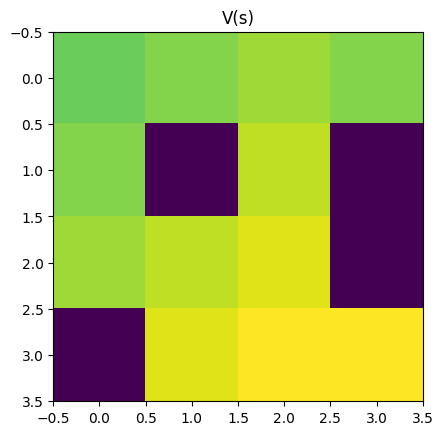

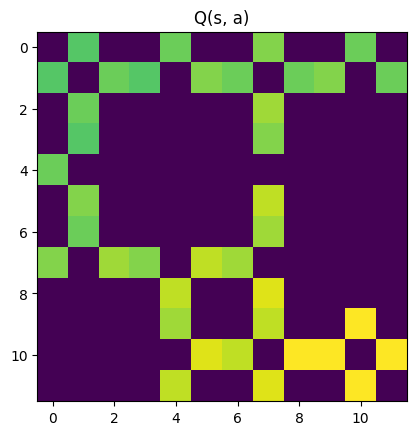

In [80]:
# --------------
# Your answer to 3.
# --------------

V = Q.max(axis=1)
plt.imshow(V.reshape((4,4)))
plt.title("V(s)")
plt.show()

Q_show = np.zeros((12,12))
for x in range(4):
  for y in range(4):
    Q_show[3*x][3*y+1] = Q[x*4+y][3] # top
    Q_show[3*x+1][3*y] = Q[x*4+y][0] # left
    Q_show[3*x+2][3*y+1] = Q[x*4+y][1] # bottom
    Q_show[3*x+1][3*y+2] = Q[x*4+y][2] # right
plt.imshow(Q_show)
plt.title("Q(s, a)")
plt.show()

# Exercise 3: Q-Learning


L'algorithme Q-Learning nous permet d'estimer la Q fonction optimale en utilisant uniquement les trajectoires du MDP obtenues en suivant une certaine politique d'exploration. 

Q-learning avec une exploration de type $\varepsilon$-greedy effectue la mise à jour suivante au temps $t$ :

1. Dans l'état $s_t$, prendre une action $a_t$ telle que $a_t$ est aléatoire avec une probabilité $\varepsilon$ et $a_t \in \arg\max_a \hat{Q}_t(s_t,a) $ avec une probabilité $1-\varepsilon$ (**fonction d'action**) ;
2. Observer $s_{t+1}$ et la récompense $r_t$ (**step dans l'environnement**) ;
3. Calculer $\delta_t = r_t + \gamma \max_a \hat{Q}_t(s_{t+1}, a) - \hat{Q}_t(s_t, a_t)$ (**à faire dans .optimize()**) ;
4. Mettre à jour $\hat{Q}_{t+1}(s, a) = \hat{Q}_t(s, a) + \alpha_t(s,a)\delta_t\mathbb{1}\{s=s_t, a=a_t\}$ (**à faire aussi dans .optimize**)


Implémentez l'apprentissage Q et testez sa convergence.

In [88]:
class QLearning:
    """
    Implements Q-learning algorithm with epsilon-greedy exploration

    If learning_rate is None; alpha(x,a) = 1/max(1, N(s,a))**alpha
    """
    def __init__(self, env, gamma, alpha=0.6, learning_rate=None, min_learning_rate=0.01, epsilon=1.0, epsilon_decay=0.9995,
                 epsilon_min=0.25, seed=42):
        self.env = env # L'environnement de l'agent
        self.gamma = gamma # Taux d'actualisation
        self.alpha =  alpha # Taux d'apprentissage
        self.learning_rate = learning_rate # Taux d'apprentissage pour Q-learning
        self.min_learning_rate =  min_learning_rate # Taux d'apprentissage minimum pour Q-learning
        self.epsilon = epsilon # Taux d'exploration
        self.epsilon_decay = epsilon_decay # Taux de décroissance de l'exploration
        self.epsilon_min = epsilon_min # Taux d'exploration minimum
        self.Q = np.zeros((env.Ns, env.Na)) # Matrice Q de l'agent
        self.Nsa = np.zeros((env.Ns, env.Na)) # Nombre de fois où l'agent est passé dans un état et a pris une action
        self.state = self.env.reset() # État initial de l'agent
        self.RS = np.random.RandomState(seed) # Générateur de nombres aléatoires pour l'exploration

    def get_delta(self, r, x, a, y, done):
        """
        Calcule la différence entre la valeur Q actuelle et la valeur Q attendue pour l'état et l'action courants
        :param r: reward (récompense obtenue)
        :param x: current state (état courant)
        :param a: current action (action courante)
        :param y: next state (prochain état)
        :param done: indique si la partie est finie ou non
        :return: la différence
        """
        max_q_y_a = self.Q[y,:].max() # La valeur Q maximale pour le prochain état
        q_x_a =  self.Q[x,a] # La valeur Q actuelle pour l'état et l'action courants

        return r + self.gamma*max_q_y_a - q_x_a

    def get_learning_rate(self, s, a):
      """
      Utilisé pour calculer le taux d'apprentissage pour l'agent en fonction de l'état courant (s) et de l'action courante (a).
      """
      if self.learning_rate is None:
         return max(1.0/max(1.0, self.Nsa[s, a])**self.alpha, self.min_learning_rate)
      else:
        return max(self.learning_rate, self.min_learning_rate)

    def getAction(self,etat_actuel):
        #CHOIX DE l'action
        if self.RS.uniform(0, 1) < self.epsilon:
            return np.random.choice(self.env.actions) #action aleatoire parmis les 3 : exploration

        return self.Q[etat_actuel,:].argmax() #meilleur action : exploitation

    def step(self):
        etat_actuel = self.env.state

        action = self.getAction(etat_actuel)

        alpha = self.get_learning_rate(etat_actuel,action)

        next_state, reward, done, info = self.env.step(action)

        delta = self.get_delta(reward,etat_actuel,action,next_state,done)

        self.Q[etat_actuel,action] = self.Q[etat_actuel, action] + alpha * delta

        #MAJ des params
        self.Nsa[etat_actuel,action]+=1

        if done:
            self.epsilon = max(self.epsilon_min,self.epsilon*self.epsilon_decay)
            self.env.reset()

(S: starting point, safe) (F: frozen surface, safe) (H: hole, fall to your doom) (G: goal, where the frisbee is located)
SFFF
FHFH
FFFH
HFFG
Current state 1
None
optimal policy:  [1 2 1 0 1 0 1 0 2 1 1 0 0 2 2 0]
est policy: [2 2 1 0 1 0 1 0 2 2 1 0 0 2 2 3]
0
true:  [14.70165307 15.47543401 15.47543401 14.70165307]
est:  [14.70183777 15.47561859 15.47561872 14.70183777]
----------------------------
1
true:  [14.70165307  0.         16.28994026 15.47543401]
est:  [14.70183777  0.         16.29012497 15.4756187 ]
----------------------------
2
true:  [15.47543401 17.14731526 15.47543401 16.28994026]
est:  [15.4756187  17.14749997 15.47561867 16.29012495]
----------------------------
3
true:  [16.28994026  0.         15.47543401 15.47543401]
est:  [16.29012495  0.         15.47554701 15.47553602]
----------------------------
4
true:  [15.47543401 16.28994026  0.         14.70165307]
est:  [15.4751076  16.2901249   0.         14.70154394]
----------------------------
5
true:  [0. 0. 0. 0.

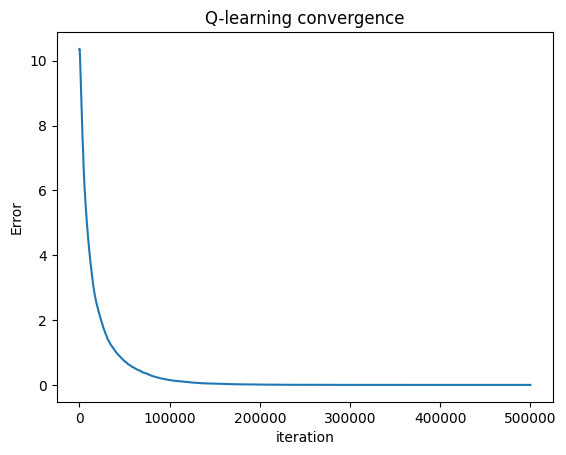

In [89]:
# ---------------------------
# Convergence of Q-Learning
# ---------------------------

# Number of Q learning iterations
n_steps = int(5e5)  
#n_steps = 10

# Get optimal value function and its greedy policy
Q0 = np.zeros((env.Ns,env.Na)) # Initialisation de la matrice Q
Q_opt, pi_opt = value_iteration(Q0, env) # Obtention de la valeur optimale de Q et de la politique optimale

# Create qlearning object
qlearning = QLearning(env,gamma=env.gamma) # création de l'objet QLearning en utilisant l'environnement et le taux d'actualisation

# Iterate
tt = 0
Q_est = np.zeros((n_steps,env.Ns,env.Na)) # matrice pour stocker les estimation de Q
while tt < n_steps:
    qlearning.step() # Mettre à jour la matrice Q
    # Store estimate of Q*
    Q_est[tt, :, :] = qlearning.Q # stocker l'estimation de Q à chaque itération
    tt +=1

# Compute greedy policy (with estimated Q)
greedy_policy = np.argmax(qlearning.Q, axis=1)

# Plot
diff = np.abs(Q_est - Q_opt).mean(axis=(1,2))
plt.plot(diff)
plt.xlabel('iteration')
plt.ylabel('Error')
plt.title("Q-learning convergence")

print(env.render())
print("optimal policy: ", pi_opt)
print("est policy:", greedy_policy)

for state in env.states:
    print(state)
    print("true: ", Q_opt[state, :])
    print("est: ", Q_est[-1,state, :])
    print("----------------------------")

# Exercise 4: SARSA

SARSA est similaire au Q learning, mais c'est un algorithme *on policy* : il suit une politique (stochastique) $\pi_Q$ et met à jour son estimation vers la valeur de cette politique. Un choix possible est :

$$
\pi_Q(a|s) = \frac{ \exp(\tau^{-1}Q(s,a))  }{\sum_{a'}\exp(\tau^{-1}Q(s,a')) }
$$
où $\tau$ est un paramètre de "controle" : lorsque $\tau$ s'approche de 0, $\pi_Q(a|s)$ se rapproche de la politique greedy (déterministe) $a \in \arg\max_{a'}Q(s,a')$.

À chaque instant $t$, SARSA conserve une estimation $\hat{Q}_t$ de la vraie Q fonction  et utilise $\pi_{\hat{Q}_t}(a|s)$ pour choisir l'action $a_t$. Si $\tau \to 0$ avec un taux approprié comme $t \to \infty$, $\hat{Q}_t$ converge vers $Q$ et $\pi_{\hat{Q}_t}(a|s)$ converge vers la politique optimale $\pi^*$. 

La mise à jour SARSA au temps $t$ est effectuée comme suit :

1. Dans l'état $s_t$, on effectue l'action $a_t \sim \pi_{\hat{Q}_t}(a|s_t)$ ;
2. Observer $s_{t+1}$ et la récompense $r_t$ ;
3. Echantillonner l'action suivante $a_{t+1} \sim \pi_{\hat{Q}_t}(a|s_{t+1})$;

4. Calculer $\delta_t = r_t + \gamma \hat{Q}_t(s_{t+1}, a_{t+1}) - \hat{Q}_t(s_t, a_t)$;
5. Actualisez $\hat{Q}_{t+1}(s, a) = \hat{Q}_t(s, a) + \alpha_t(s,a)\delta_t\mathbb{1}\{s=s_t, a=a_t\}$.

In [ ]:
#-------------------------------
# SARSA implementation
# ------------------------------

class Sarsa:
    """
    Implements SARSA algorithm.
    """
    def __init__(self, env, gamma, learning_rate=None, tau=1.0): # Again, those are suggestions, you can add more arguments
        self.env = env
        self.gamma = gamma
        self.learning_rate = learning_rate
        self.tau = tau
    def act():
        pass
    def optimize():
        pass


In [ ]:
# ---------------------------
# Convergence of SARSA
# ---------------------------

# Create SARSA object
sarsa = Sarsa(env, gamma=env.gamma)

# Again, you can use Q_opt and pi_opt from value_iteration to check sarsa's convergence. 

Comment ces deux algorithmes se comportent-ils ? 
Trouvent-ils tous les deux la politique optimale ?